For a mutually inclined CBP orbiting a contact binary, what is the precession timescale? Is it short enough that assuming transits **all through** the Kepler data is obviously dumb?

For simplicity, consider just the precession rate of the nodes of a massless particle's orbit around a circular binary, as given by Eq 2.24 of Farago & Laskar (2010). From their equation, some simple rewriting gives (see notes 17/05/22, pg 2)

$$
\tau_{\rm prec} = \frac{4}{3G^{1/2}} \frac{a_2^{7/2}}{a_1^2} \frac{(m_0 + m_1)^{3/2}}{m_0 m_1} \frac{(1-e_2^2)^2}{\cos i_2}.
$$

To answer our search related questions, compute this in useful terms:

In [2]:
from astropy import units as u, constants as c
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_τ_prec(m_0, m_1, a_1, a_2, e_2, i_2):
    return 4/(3*c.G**(1/2)) * a_2**(7/2) / a_1**2 * \
           (m_0 + m_1)**(3/2) / (m_0 * m_1) * \
           (1-e_2**2)**2 / np.cos(i_2)
        
def get_a_1(m_0, m_1, P_EB):
    '''
    a_2 is semimajor axis of the particle in the barycentric reference frame.
    a_1 is the semimajor axis of the binary in the barycentric ref frame. the
    latter can be obtained directly from Kepler's 3rd.
    '''
    return (c.G*(m_0 + m_1) / (4*np.pi*np.pi) * P_EB**2 )**(1/3)

In [3]:
# Masses of each inner star of the binary
m_0_grid = np.arange(0.2, 1.4+0.1, 0.2)*u.Msun
m_1_grid = np.arange(0.2, 1.3+0.1, 0.2)*u.Msun
# Mutual inclination, defined s.t. i_2 = 90deg is coplanar
i_2_grid = np.append(
            np.arange(0, np.pi/2, np.pi/16),
            np.arange(np.pi/2-np.pi/16, np.pi/2+np.pi/129, np.pi/128)
            )*u.radian
# Planet eccentricity
e_2 = 0
# Grid of inner binary periods
P_EB_grid = np.logspace(-1, 2, 8, base=10)*u.day

# Any combination of m_0, m_1, and P_EB are allowed. This
# determines a_1. Then any a_2 and i_2 are allowed. These
# combined determine the precession timescale.
system_params = {'a_1':[], 'm_0':[], 'm_1':[], 'P_EB':[],
                 'a_2':[], 'i_2':[], 'τ_prec': []}
ix = 0
print(len(m_0_grid)*len(m_1_grid)*len(P_EB_grid)*len(i_2_grid)*len(np.arange(5, 100+5, 20)))
for m_0 in m_0_grid:
    for m_1 in m_1_grid:
        for P_EB in P_EB_grid:
            a_1 = get_a_1(m_0, m_1, P_EB)
            
            a_2_grid = np.arange(5, 100+5, 20)*a_1
            
            for a_2 in a_2_grid:
                for i_2 in i_2_grid:
                    if ix % 1000 == 0:
                        print(ix)
                    
                    τ_prec = get_τ_prec(m_0, m_1, a_1, a_2, e_2, i_2)
            
                    system_params['a_1'].append(a_1.to(u.AU).value)
                    system_params['m_1'].append(m_1.to(u.Msun).value)
                    system_params['m_0'].append(m_0.to(u.Msun).value)
                    system_params['P_EB'].append(P_EB.to(u.day).value)
                    system_params['a_2'].append(a_2.to(u.AU).value)
                    system_params['i_2'].append(i_2.to(u.degree).value)
                    system_params['τ_prec'].append(τ_prec.to(u.yr).value)
                    
                    ix += 1

33320
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000


In [4]:
import pandas as pd
df = pd.DataFrame(system_params)

In [5]:
df.head()

,P_EB,a_1,a_2,i_2,m_0,m_1,τ_prec
0,0.1,0.003107,0.015535,0.00,0.2,0.2,0.064957
1,0.1,0.003107,0.015535,11.25,0.2,0.2,0.066229
2,0.1,0.003107,0.015535,22.50,0.2,0.2,0.070309
3,0.1,0.003107,0.015535,33.75,0.2,0.2,0.078123
4,0.1,0.003107,0.015535,45.00,0.2,0.2,0.091863


In [6]:
df['τ_prec'].describe()

count    3.332000e+04
mean     7.958714e+18
std      1.035179e+20
min      6.495665e-02
25%      5.588886e+02
50%      1.648475e+04
75%      2.768305e+05
max      4.134888e+21
Name: τ_prec, dtype: float64

In [7]:
min(df['τ_prec'])

0.064956654658195542

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


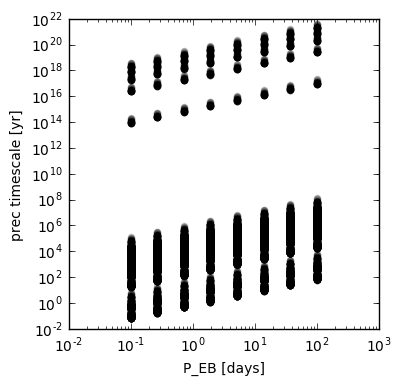

In [8]:
f, ax = plt.subplots(figsize=(4,4))
x = np.array(df['P_EB'])
y = np.array(df['τ_prec'])
ax.scatter(x, y, c='k', alpha=0.1)
ax.set_xlabel('P_EB [days]')
ax.set_ylabel('prec timescale [yr]')
ax.set_xscale('log')
ax.set_yscale('log')
f.show()

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


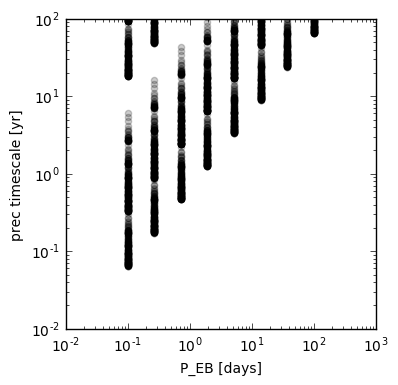

In [9]:
f, ax = plt.subplots(figsize=(4,4))
x = np.array(df['P_EB'])
y = np.array(df['τ_prec'])
ax.scatter(x, y, c='k', alpha=0.1)
ax.set_xlabel('P_EB [days]')
ax.set_ylabel('prec timescale [yr]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-2,1e2])
f.show()

Ok, we're interested in the systems that have precession timescales less than... like 10 yrs? 100 yrs? The point is that they need to be short enough that making the assumption of "all transits go are visible in the Kepler data" is a bad one. (If we're making this counterargument in a strong way)

In [10]:
# df_sp : dataframe with short period precession
df_sp = df[df['τ_prec'] < 1e2]
df_sp.describe()

,P_EB,a_1,a_2,i_2,m_0,m_1,τ_prec
count,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000
mean,8.043270,0.063666,0.333530,54.164594,0.804069,0.804069,20.232643
std,19.140520,0.102434,0.505810,30.096138,0.396267,0.396267,26.222870
min,0.100000,0.003107,0.015535,0.000000,0.200000,0.200000,0.064957
25%,0.268270,0.008651,0.051286,22.500000,0.400000,0.400000,1.190963
50%,0.719686,0.019804,0.141141,67.500000,0.800000,0.800000,6.898608
75%,5.179475,0.071273,0.356363,81.562500,1.200000,1.200000,29.316951
max,100.000000,0.594330,2.971648,88.593750,1.400000,1.400000,99.632742


In [11]:
np.unique(df_sp['i_2'])

array([  0.     ,  11.25   ,  22.5    ,  33.75   ,  45.     ,  56.25   ,
        67.5    ,  78.75   ,  80.15625,  81.5625 ,  82.96875,  84.375  ,
        85.78125,  87.1875 ,  88.59375])

In [12]:
np.histogram(df_sp['i_2'])

(array([ 480,  478,  476,  470,    0,  458,  423,  384,  630, 1804]),
 array([  0.      ,   8.859375,  17.71875 ,  26.578125,  35.4375  ,
         44.296875,  53.15625 ,  62.015625,  70.875   ,  79.734375,
         88.59375 ]))

The interesting take-away is that mutual inclinations above ~79 deg make this kind of precession timescale ignoreable for the purpose of my search. (Interesting....).

So: you're not _as_ sensitive to things with mutual inclinations less than 79 deg (i.e. with misalignments of the orbital planes of more than 20 deg), but above that (towards greater degrees of coplanarity), it's pretty much fine b/c of that 1/cosi in the precession timescale.

In [13]:
np.unique(i_2_grid.to(u.degree))

<Quantity [  0.     , 11.25   , 22.5    , 33.75   , 45.     , 56.25   ,
            67.5    , 78.75   , 80.15625, 81.5625 , 82.96875, 84.375  ,
            85.78125, 87.1875 , 88.59375, 90.     ] deg>

In [14]:
len(df_sp)

5603

In [15]:
len(df_sp[df_sp['i_2'] > 80])

1804

In [16]:
i_2_grid.to(u.degree)

<Quantity [  0.     , 11.25   , 22.5    , 33.75   , 45.     , 56.25   ,
            67.5    , 78.75   , 78.75   , 80.15625, 81.5625 , 82.96875,
            84.375  , 85.78125, 87.1875 , 88.59375, 90.     ] deg>

In [19]:
1/np.cos(i_2_grid[-2])

<Quantity 40.747756334461805>

# what about putting the upper bound a bit more... directly?
(can restart nb from here)

In [5]:
from astropy import units as u, constants as c
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m_0_grid = np.arange(0.1, 2+0.1, 0.1)*u.Msun
m_1_grid = np.arange(0.1, 2+0.1, 0.1)*u.Msun

m_frac = []
for m_0 in m_0_grid:
    for m_1 in m_1_grid:
        m_frac_val = (m_0 + m_1)**(5/6) / (m_0 * m_1)
        m_frac.append(m_frac_val.to(u.Msun**(-7/6)).value)
        
max(m_frac)


26.153209720236603

In [4]:
m_frac_val

<Quantity 0.7937005259840998 1 / solMass(7/6)>

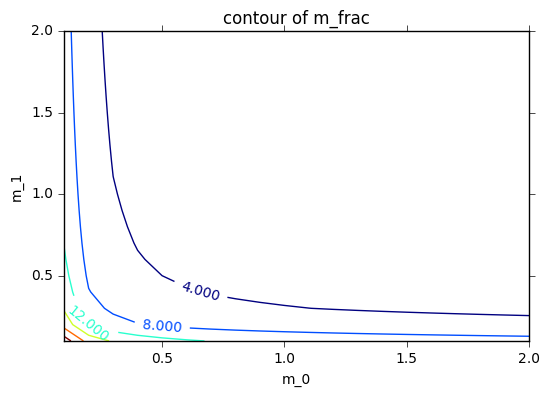

In [10]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

x = np.arange(0.1, 2+0.1, 0.1)*u.Msun
y = np.arange(0.1, 2+0.1, 0.1)*u.Msun
X, Y = np.meshgrid(x.value, y.value)
Z = (X + Y)**(5/6) / (X * Y)

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.ylabel('m_1')
plt.xlabel('m_0')
plt.title('contour of m_frac');

In [11]:
m_0 = 0.1*u.Msun 
m_1 = 0.1*u.Msun
(m_0 + m_1)**(5/6) / (m_0*m_1)

<Quantity 26.153209720236603 1 / solMass(7/6)>

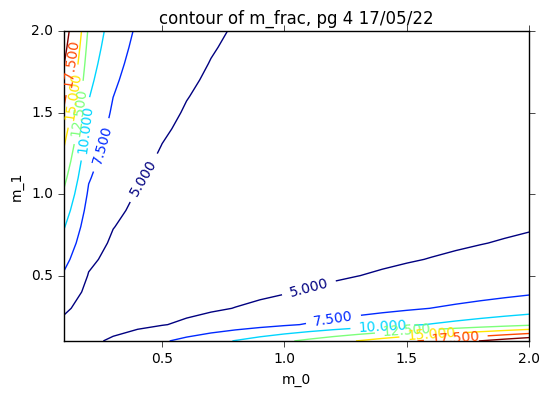

In [18]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

x = np.arange(0.1, 2+0.1, 0.1)*u.Msun
y = np.arange(0.1, 2+0.1, 0.1)*u.Msun
X, Y = np.meshgrid(x.value, y.value)
Z = (X + Y)**(2) / (X * Y)

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.ylabel('m_1')
plt.xlabel('m_0')
plt.title('contour of m_frac, pg 4 17/05/22');

In [19]:
np.max(Z)

22.050000000000001

The upper limit you get from doing stupid shit on pg 4, 17/05/22, is:

In [20]:
P_EB = 10*u.day
τ_prec = 100*u.year
m_frac_max = 22.05
e_2 = 0
x = 100

cos_i2_is_less_than = 2 * x**(7/2) / (3 * np.pi * τ_prec) * \
                      P_EB * m_frac_max
    
cos_i2_is_less_than.cgs

<Quantity 12810.82909487125>

So right, this upper limit is stupid.

# what about, pg 5, just going direct from the precession timescale argument



In [1]:
from math import pi

In [2]:
(1+0.07)**2/0.07

16.355714285714285

In [3]:
(1+0.5)**2/0.5

4.5

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


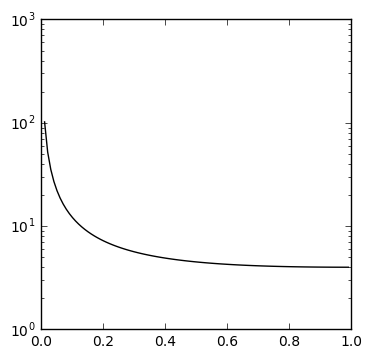

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

q = np.arange(0.01, 1, 0.01)

f, ax = plt.subplots(figsize=(4,4))

ax.plot(q, (1+q)**2/q, 'k-')
ax.set_yscale('log')
f.show()

In [11]:
from astropy import units as u
prefactor = 2/(3*pi) * 10**(7/2) * 4. * 3*u.day

In [12]:
prefactor.to(u.yr)

<Quantity 22.047019676161334 yr>

# use pg 6 expression:
$$
\tau_{\rm prec} = 22.05\,{\rm yr}\,\left(\frac{x}{10}\right)^{7/2} \left(\frac{P_{\rm EB}}{3\,{\rm days}} \right) \frac{(1+q)^2}{4q} \frac{(1-e_2^2)^2}{\cos i_2}
$$

In [3]:
from astropy import units as u

q = 1 # m_1/m_0
e_2 = 0

# using Eq 4 of Martin, Mazeh & Fabrycky 2014, which is from Holman & Wiegert 1999
x = 1.6 + 4.12/(1+q) - 5.09/((1+q)**2)

prefactor = 22.05*u.yr * (x/10)**(7/2)
prefactor

<Quantity 0.1466258101386194 yr>

In [4]:
x

2.3875

In [6]:
100/prefactor 

<Quantity 682.008166948646 1 / yr>

In [7]:
682*prefactor

<Quantity 99.99880251453843 yr>

In [8]:
import numpy as np
i_2 = np.rad2deg(np.arccos(1/682.))
i_2

89.915988562985703

In [9]:
22.05/100

0.2205

In [2]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy import units as u

%matplotlib inline

x = np.logspace(-1, 2, 100, base=10)*u.day
y = np.arange(2, 100+1, 1)
X, Y = np.meshgrid(x.value, y)
arg = 0.2205 * (X/10)**(7/2) * Y/3
arg_lt_1 = ma.masked_where(arg<1, arg)
Z = np.rad2deg(np.arccos( arg_lt_1.data ))

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in arccos


In [3]:
Z.shape

(99, 100)

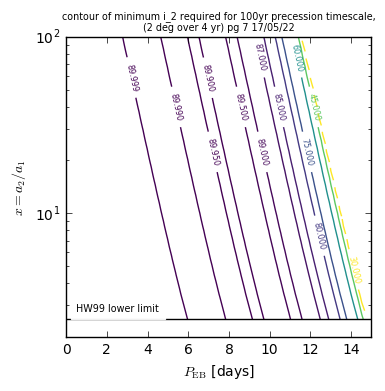

In [14]:
import matplotlib.cm as cm

f, ax = plt.subplots(figsize=(4,4))

levels = [30,45,60,75,80,85,87,89,89.5,89.9, 89.95, 89.99, 89.999]

ax.set_yscale('log')
ax.set_ylabel('$x = a_2/a_1$')
ax.set_xlabel('$P_\mathrm{EB}$ [days]')
ax.set_xlim([0,15])
ax.set_ylim([2,100])

CS = ax.contour(Z, levels,
                 origin='lower',
                 linewidths=1,
                 extent=(0.1, 20, 2, 100),
                 cmap=cm.viridis_r)

ax.clabel(CS, inline=1, fmt='%.3f', fontsize='xx-small')

ax.axhline(2.5, 0, 15, color='black')
t = ax.text(0.5, 2.7, 'HW99 lower limit', 
        color='black', verticalalignment='bottom', 
        horizontalalignment='left', fontsize='x-small')
t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='white'))

#ax.set_xscale('log')
ax.set_title('contour of minimum i_2 required for 100yr precession timescale,\n(2 deg over 4 yr) pg 7 17/05/22',
             fontsize='x-small')
f.tight_layout()
f.savefig('plots/minimum_mutual_inclination_contour_plot.pdf')

In [1]:
import numpy as np
def i_2(x, P_EB, q, e_2):
    # P_EB in days.
    # gives i_2 in deg
    return np.rad2deg( np.arccos( 22.05/100 * (x/10)**(7/2) * P_EB/3 * (1+q)**2/(4*q) * (1-e_2**2)**2 ) )

i_2(2.3875, 3, 1, 0)


89.915989569011174

In [2]:
i_2(6.75, 10., 1, 0)

79.297089896465636

In [3]:
i_2(9.03, 4, 1, 0)

78.128961357300696

In [4]:
i_2(10, 3, 1, 0)


77.261597912073697

In [5]:
np.rad2deg( np.arccos( 22.05/100 ) )

77.261597912073697